# **Sentiment Analysis of Student Feedback**

**The dataset contains three columns:**

- Student Name: Names of students.
- Feedback: Comments provided by the students.
- Sentiment: Sentiment analysis results (Neutral, Positive, etc.)

Objective:

## **Task: Data Exploration**

1. Import Libraries and Initialize Resources

In [20]:
# Importing necessary libraries
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')  # For tokenization
nltk.download('wordnet')  # For lemmatization
nltk.download('stopwords')  # For removing stopwords


[nltk_data] Downloading package punkt to C:\Users\91860/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\91860/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import wordcloud
print("WordCloud library installed successfully!")


WordCloud library installed successfully!


In [12]:
# Load the dataset
data=pd.read_csv("C:/data science material/my project/project_3/data/Student_Feedback.csv")

In [13]:
data

,Student Name,Feedback,Sentiment
0,Saanvi Nair,Amazing teaching style. Liked it very much!!!,Neutral
1,Ananya Singh,materia;l is not upto date. disappointed!,Positive
2,Riya Singh,NaN,Neutral
3,Saanvi Mishra,The teaching methods are very good and helpFULL,Positive
4,Ishaan Sharma,Too fast. Cannot follw. Improve pls!,Neutral
...,...,...,...
995,Riya Joshi,NaN,Negative
996,Ananya Mishra,materia;l is not upto date. disappointed!,Positive
997,Aanya Patel,The teaching methods are very good and helpFULL,Negative
998,Saanvi Joshi,NaN,Neutral


In [14]:
# Create a new DataFrame with 'Feedback' and 'Sentiment'
data = data[['Feedback', 'Sentiment']]


In [15]:
# Get a count of sentiments
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts

Sentiment
Neutral     340
Positive    333
Negative    327
Name: count, dtype: int64

C:\Users\91860\AppData\Local\Temp\ipykernel_20100\1868228669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='coolwarm')


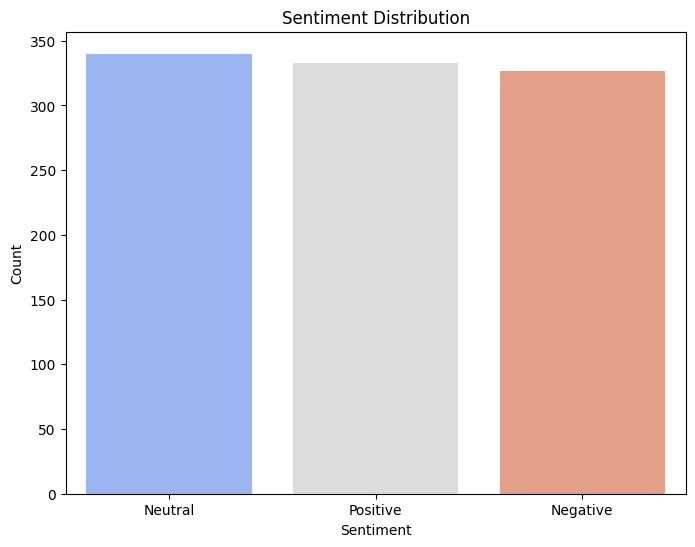

In [16]:
# Sentiment count bar plot
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=data, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## **Task: Data Cleaning**

In [ ]:
data.isnull().sum()

Feedback     226
Sentiment      0
dtype: int64

In [ ]:
data['Feedback'] = data['Feedback'].fillna('neutral')

C:\Users\91860\AppData\Local\Temp\ipykernel_21064\1332027011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Feedback'] = data['Feedback'].fillna('neutral')


In [ ]:
data.isnull().sum()

Feedback     0
Sentiment    0
dtype: int64

Initialize Lemmatizer and Stopwords

In [ ]:
# Initialize NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')  # List of stopwords

In [ ]:
# Remove extra spaces and convert text to lowercase in the Feedback column
data['Feedback'] = data['Feedback'].str.strip()  # Remove leading/trailing spaces
data['Feedback'] = data['Feedback'].str.lower()  # Convert to lowercase

Preprocessing Function

It first ensures that the column text exists in the DataFrame.
Converts the text to lowercase for uniformity.
Tokenizes the text into words.
Filters out non-alphabetic words and unwanted tokens (like URLs).
Lemmatizes the words to reduce them to their root form.

In [ ]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back to form the cleaned sentence
    return ' '.join(tokens)

# Apply preprocessing to the Feedback column
data['Cleaned_Feedback'] = data['Feedback'].apply(preprocess_text)

# Display the first few rows after cleaning
data[['Feedback', 'Cleaned_Feedback']].head()

,Feedback,Cleaned_Feedback
0,amazing teaching style. liked it very much!!!,amazing teaching style liked much
1,materia;l is not upto date. disappointed!,material upto date disappointed
2,neutral,neutral
3,the teaching methods are very good and helpfull,teaching method good helpfull
4,too fast. cannot follw. improve pls!,fast follw improve pls


In [ ]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'Cleaned_Student_Feedback.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved successfully as {cleaned_file_path}!")


Cleaned data saved successfully as Cleaned_Student_Feedback.csv!
